### 3.2.2 Classification and regression with a two-layer perceptron

#### 3.2.2 Classification of linearly non-separable data

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [61]:
#Draw two sets of points/patterns in 2D from multivariate normal distribution
def generatePattern(n,shuffle=1, verbose=1, pattern=1):
    
   
    mu_A = np.array([1.0, 0.3])
    mu_B = np.array([0.0, -0.1])
    sigma_A = 0.2
    sigma_B = 0.3
    
    
    class_A=np.zeros((2,n))
    class_B=np.zeros((2,n))
    class_A[0]= np.concatenate((np.random.randn(1,int(0.5*n))*sigma_A-mu_A[0],np.random.randn(1,int(0.5*n))*sigma_A+mu_A[0]),axis=1)
    class_B[0]= np.random.randn(1,n)*sigma_B +mu_B[0]
    class_A[1]= np.random.randn(1,n)*sigma_A +mu_A[1]
    class_B[1]= np.random.randn(1,n)*sigma_B +mu_B[1]
    
    if shuffle:
        
        patterns=np.concatenate((class_A,class_B),axis=1)
        patterns = np.concatenate((patterns,np.ones((1,2*n))))
        targets=np.concatenate((np.ones(n),-np.ones(n)))
        i = np.arange(patterns.shape[1])
        np.random.shuffle(i)
        patterns=patterns[:,i]
        targets=targets[i]
        #print(patterns)
        #print(targets)
    else:
        patterns = np.concatenate((class_A,class_B),axis=1)
        targets = np.array([np.ones(n,),-np.ones(n,)])
        targets = np.ravel(targets)
    
    if verbose:
        #Plotting classes if desired
        plt_A, = plt.plot(class_A[0,:],class_A[1,:],'g^', label='Class A')
        plt_B, = plt.plot(class_B[0,:],class_B[1,:],'bs', label='Class B')
        plt.legend(handles=[plt_A, plt_B])
        plt.show()
    
    
    
    if pattern:
        return patterns, targets
    else:
        return class_A, class_B
    

In [62]:
def error_mse(T, Y):
    #return np.sum((T - Y) ** 2) / 2
    return np.mean(((Y-T)**2))

def accuracy(T, Y):
    #return np.sum((T - Y) ** 2) / 2
    return np.sum(abs(T-Y)/2)/len(T)

def phi(x):
    return 2/(1+np.exp(-x))-1


def phi_prime(x):
    return 0.5*((1+phi(x))*(1-phi(x)))

def forward_pass(X,W,V):
    #print(W.shape)
    #print(X.shape)
    H = phi(np.matmul(W,X))
    #print(H.shape)
    H=np.vstack([H,np.ones(np.shape(H)[1])])
    #print(H.shape)
    #print(V.shape)
    O = phi(np.matmul(V,H))
    #print(O.shape)
    return H,O

def backward_pass(O,T,H,V,hidden):
    delta_o = np.multiply((O-T),phi_prime(O))
    #print("hej hopp")
    #print(V.shape)
    #print(delta_y.shape)
    #print(phi_prime(H).shape)
    delta_h = np.multiply(np.matmul(np.transpose(V),delta_o),phi_prime(H))
    delta_h = delta_h[0:hidden]
    return delta_o, delta_h

def update_weights(X,H,W,V,eta,delta_o, delta_h,dw,dv,alpha):
    dw = alpha*dw-(1-alpha)*np.matmul(delta_h,np.transpose(X))
    dv = alpha*dv - (1-alpha)*np.matmul(delta_o,np.transpose(H))
    W = W + dw*eta
    V = V + dv*eta
    return W,V,dw,dv

def backprop(eta,X,T,W,V,hidden,epochs,alpha=0.9):
    weights1 = []
    weights2 = []
    mse_errors = []
    accuracys = []
    #acc = 0
    dw = np.zeros(W.shape)
    dv = np.zeros(V.shape)
    #print(eta,X,T,W,V,hidden,epochs)
    for i in range(epochs):
        weights1.append(W)
        weights2.append(V)
        H,O = forward_pass(X,W,V)
        mse = error_mse(T,O)
        mse_errors.append(mse)
        acc = accuracy(T,O)
        accuracys.append(acc)
        delta_o,delta_h = backward_pass(O,T,H,V,hidden)
        W,V,dw,dv = update_weights(X,H,W,V,eta,delta_o,delta_h,dw,dv,alpha)
        #print(H)
        #print("print")
        #print(Y)
    weights1.append(W)
    weights2.append(V)
        
    return weights1, weights2,mse_errors,accuracys


In [63]:
def weights_init_MLP(n_out,n_in,scale,hidden):
    W = scale*np.random.randn(hidden,nPerceptron+1)
    V = scale*np.random.randn(1,hidden+1)
    #print(W.shape)
    #W = np.append(W,scale*np.random.normal())
    #W = np.hstack((W,np.random.normal()))
    #print(W.shape)
    return V,W

In [64]:
def predict(validation,W,V, classification = True):
        #print(validation)
        _, prediction = forward_pass(validation,W,V)
        
        return prediction

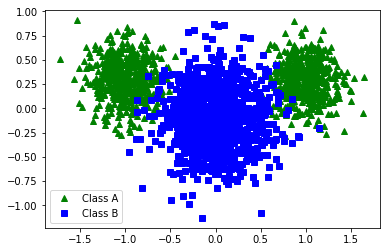

(15, 3)
(1, 16)
(3, 2000)
(101, 15, 3)
(101, 1, 16)
mse
acc


In [89]:
eta = 1e-4
#n_in = 
n_out = 1
nPerceptron = 3
scale = 1e-2
hidden_perceptrons = 15
epochs = 100
n = 100
#W,V = weights_init_MLP(n_out,n_in,scale,nPerceptron)
X,T = generatePattern(1000,verbose=1)

print(W.shape)
print(V.shape)
print(X.shape)
#validation = X[:,180:199]
#print("VAL")
#print(validation)
#validation_T = T[180:199]
#X = X[:,0:179]
#print(X.shape)
#T = T[0:179]
    #print(validation_T)
mu_A = np.array([1.0, 0.3])
mu_B = np.array([0.0, -0.1])
sigma_A = 0.2
sigma_B = 0.3


class_A=np.zeros((2,n))
class_B=np.zeros((2,n))
class_A[0]= np.concatenate((np.random.randn(1,int(0.5*n))*sigma_A-mu_A[0],np.random.randn(1,int(0.5*n))*sigma_A+mu_A[0]),axis=1)
class_B[0]= np.random.randn(1,n)*sigma_B +mu_B[0]
class_A[1]= np.random.randn(1,n)*sigma_A +mu_A[1]
class_B[1]= np.random.randn(1,n)*sigma_B +mu_B[1]
np.random.shuffle(class_A.T)
np.random.shuffle(class_B.T)


class_A_train=class_A[:,:int(0.5*n)]
class_B_train=class_B
class_A_val=class_A[:,int(0.5*n):]

X=np.concatenate((class_A_train,class_B_train),axis=1)
X=np.concatenate((X,np.ones((1,np.shape(X)[1]))))
T=np.concatenate((np.ones(np.shape(class_A_train)[1]),-np.ones(np.shape(class_B_train)[1])))
i = np.arange(X.shape[1])
np.random.shuffle(i)
X=X[:,s]
T=T[s]

X_val=np.concatenate((class_A_val,np.ones((1,np.shape(class_A_val)[1]))))
T_val=np.ones((np.shape(class_A_val)[1]))
i = np.arange(X_val.shape[1])
np.random.shuffle(i)
X_val=X_val[:,i]
T_val=T_val[i]


#patterns_train1, patterns_test1, targets_train, targets_test = train_test_split(X.T, T, test_size=0.2)
#X=patterns_train
#X_val=patterns_test
W = scale*np.random.randn(hidden_perceptrons,np.shape(X)[0])
V = scale*np.random.randn(n_out,hidden_perceptrons+1)
#T = targets_train
#T_val = targets_test
W_train,V_train,mse,acc = backprop(eta,X,T,W,V,hidden_perceptrons,epochs)
mse_val = []
acc_val = []
W_train = np.array(W_train)
V_train = np.array(V_train)
print(W_train.shape)
print(V_train.shape)
for i in range(1,W_train.shape[0]):
    p = predict(X_val,W_train[i,:,:],V_train[i,:,:])
    mse_val.append(error_mse(T_val,p))
    acc_val.append(accuracy(T_val,p))
    
print("mse")
#print(mse_val)
print("acc")
#print(acc)


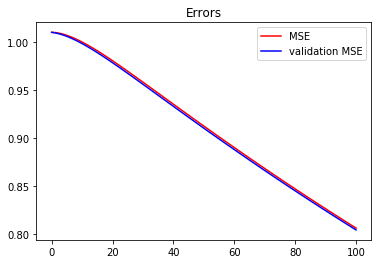

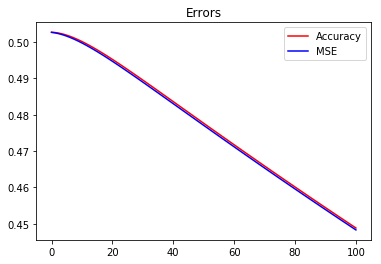

In [90]:
plt_mse, = plt.plot(np.linspace(0,epochs,epochs),mse,'r', label='MSE')
plt_mse_val, = plt.plot(np.linspace(0,epochs,epochs),mse_val,'b', label='validation MSE')
plt.legend(handles=[plt_mse,plt_mse_val])
#plt.axis([0,20,0,100])
plt.title('Errors')
plt.show()
plt_acc, = plt.plot(np.linspace(0,epochs,epochs),acc,'r',label='Accuracy')
plt_acc_val, = plt.plot(np.linspace(0,epochs,epochs),acc_val,'b', label='MSE')
plt.legend(handles=[plt_acc,plt_acc_val])
plt.title('Errors')
plt.show()